# The k-Armed Bandit Problem

A bandit is a slot machine with k arms, this is a simplified setting, one that does not involve learning to act in more than one situation (a.k.a. nonassociative setting.)

The actual reward from a bandit is stochastic, the algorithm learns a model of the Expected reward, and the actual reward is random with q∗(At) as mean (expectation) and variance 1.

### 10-armed bandits testbed (stationary distribution)

In [35]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
n = 2000
k = 10
models = np.random.normal(0.0, 1.0, size=(n, k))

models[0:1,:]

array([[ 0.28169638,  0.9931327 , -1.65791675, -1.4304641 , -0.51926051,
        -0.79534805, -1.20951424, -1.33328975, -0.77566334, -0.36493265]])

In [37]:
# the bandit returns the actual reward from the true model
def bandit(row, a):
    r = models[row, a] + np.random.normal()
    return r

### Optimistic Initial Values
All values of Q are initialized to +5 which is wildly optimistic. This optimism encourages action-value
methods to explore. Whichever actions are initially selected, the reward is less than
the starting estimates; the learner switches to other actions, being “disappointed”
with the rewards it is receiving. The result is that all actions are tried several times
before the value estimates converge. The system does a fair amount of exploration
even if greedy actions are selected all the time


### Reward optimization method: epsilon-greedy

In [38]:
# ε-greedy method
def epsilon_greedy(Q, epsilon):
    a =  np.random.choice(range(10)) if np.random.sample() < epsilon else np.argmax(Q)
    return a

### Action value estimation: average 

The estimator of the action values is the averages of the observed rewards for each action.
To compute these estimators with minimum computational cost, we apply an incremental formula for updating averages with small, constant computation required to process
each new reward.

In [39]:
def update_rule(old_estimate, target, step_size):
    new_estimate = old_estimate + step_size * (target - old_estimate)
    return new_estimate

In [48]:
optimism = 0
Qs = np.ones(shape=(n, k)) * optimism
num_steps = 1000
epsilon = .01
 
# ratio for plotting performance
ratio_est_vs_opt = np.zeros(shape=(n, num_steps))
# accumulators for plotting performance
rewards_accum =   np.zeros(shape=(n, num_steps))
opt_rewards_accum =   np.zeros(shape=(n, num_steps)) + 1/10**6 # avoid division by zero at step zero
    
# for each model
for i in range(n):
    N = np.zeros(k) # action_counters
    
    # 1 run
    for t in range(num_steps):       
        # estimate best action, based on estimated action-values, with epsilon-greedy method
        a = epsilon_greedy(Qs[i,:], epsilon)
        
        # act and collect the actual reward from the bandit
        reward = bandit(i, a)

        # update our estimate of the action value 
        N[a] += 1
        Qs[i, a] = update_rule(Qs[i, a], reward, 1/N[a])
              
        # store the accumulators to calculate the ratio of epsilon-greedy vs optimal at each step for plotting
        if t > 0:
            rewards_accum[i, t] = rewards_accum[i, t-1] + reward
            opt_rewards_accum[i, t] = opt_rewards_accum[i, t-1] + bandit(i, np.argmax(models[i,:]))

# Compute ratio of cumulative rewards
# The stationary bandit test bed often contains commulative rewards that are close to zero
# I average over the 2000 models before computing the ratio

# mean along rows (avg of each step over all models)
avg_rewards_accum = np.mean(rewards_accum, 0)
avg_opt_rewards_accum = np.mean(opt_rewards_accum, 0)

#  average performance over all models
avg_ratio_est_vs_opt = avg_rewards_accum / avg_opt_rewards_accum

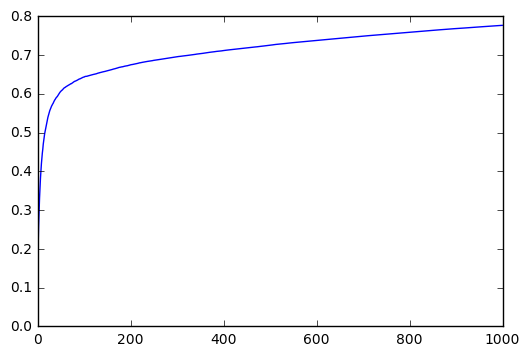

In [49]:
plt.plot(avg_ratio_est_vs_opt)